In [142]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
eq = pd.read_csv("earthquakes.csv")
eq.shape
(23412, 21)

(23412, 21)

In [144]:
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [145]:
eq = eq[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
eq.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [146]:
file_path = "110m_cultural/ne_110m_admin_0_countries.shp"

# Read the shapefile
world = gpd.read_file(file_path)

# Check the columns of the GeoDataFrame
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [147]:
print(world.head())  # View the first 5 rows


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

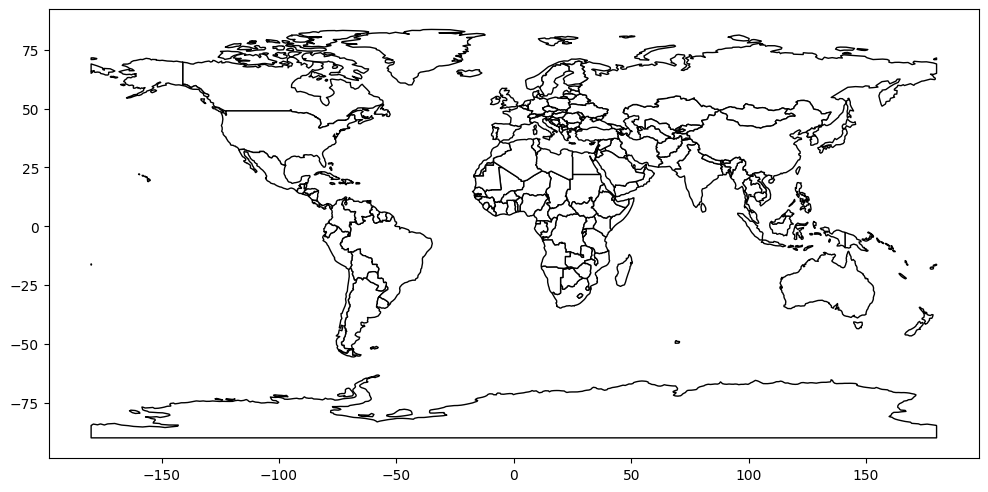

In [148]:
world.plot(color='white', edgecolor='black', figsize=(12,8))
plt.show()

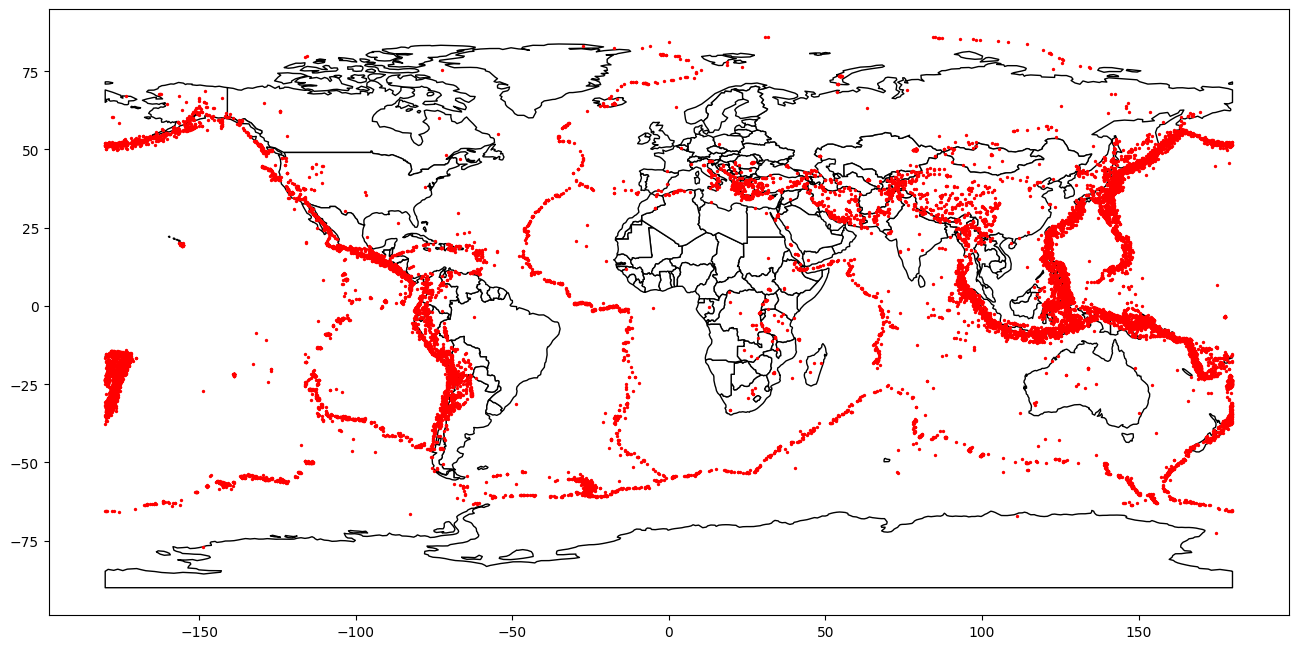

In [149]:
ax = world.plot(color='white', edgecolor='black', figsize=(16,12))
gdf.plot(ax=ax, color='red', markersize=2)
plt.show()

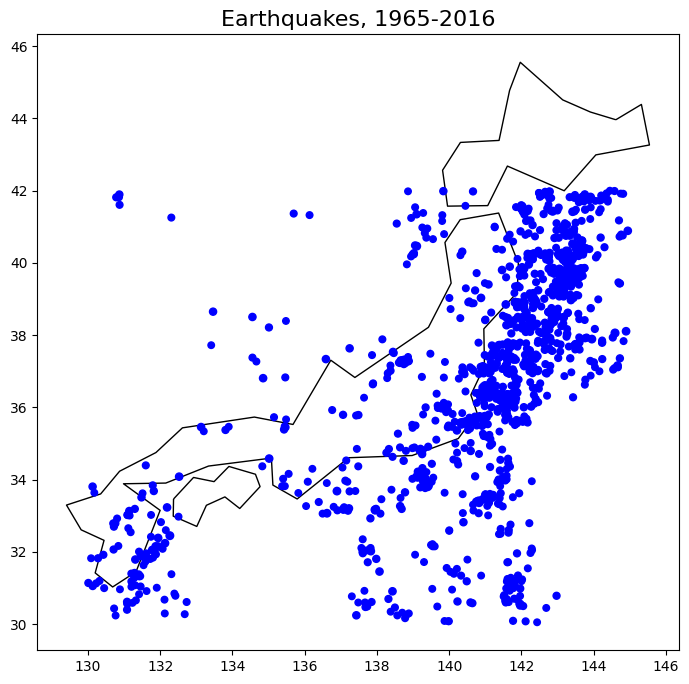

In [150]:
japan_lat = 36.204824
japan_long = 138.252924

japan_eq = eq[(eq.Latitude > 30) & (eq.Latitude < 42) & (eq.Longitude > 130) & (eq.Longitude < 145)]

japan_eq = japan_eq.reset_index(drop=True)

japan_gdf = gpd.GeoDataFrame(japan_eq, geometry=gpd.points_from_xy(japan_eq.Longitude, japan_eq.Latitude))

ax = world[world['NAME'] == 'Japan'].plot(color='white', edgecolor='black', figsize=(12, 8))

japan_gdf.plot(ax=ax, color='blue', markersize=japan_gdf['Magnitude']*4)
plt.title("Earthquakes, 1965-2016", fontsize=16)
plt.show()

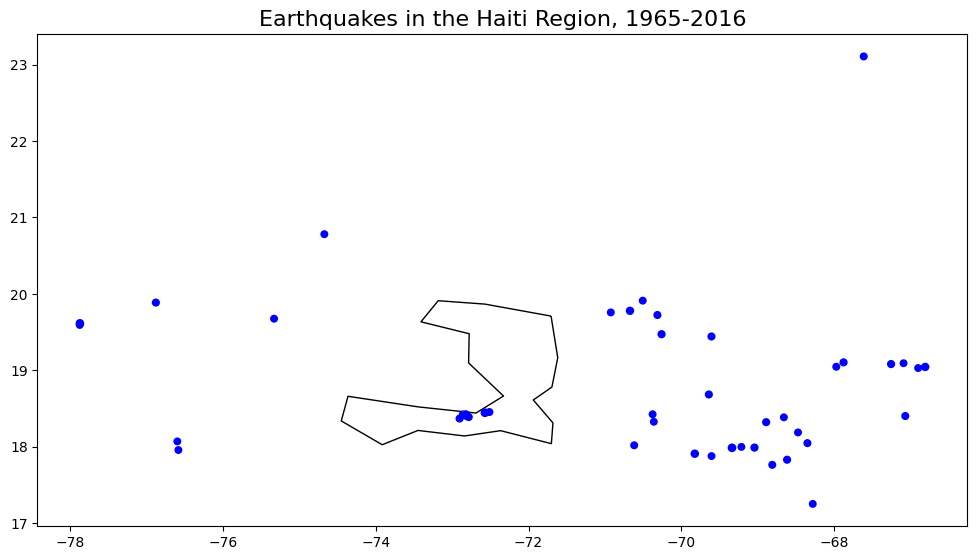

In [151]:
hat_lat = 18.971188
hat_long = -72.285217

lat_lower = hat_lat - 6
lat_upper = hat_lat + 6
long_lower = hat_long - 6
long_upper = hat_long + 6

hat_eq = eq[(eq.Latitude > lat_lower) & (eq.Latitude < lat_upper) & 
            (eq.Longitude > long_lower) & (eq.Longitude < long_upper)]

hat_eq = hat_eq.reset_index(drop=True)

hat_gdf = gpd.GeoDataFrame(hat_eq, geometry=gpd.points_from_xy(hat_eq.Longitude, hat_eq.Latitude))


ax = world[(world['NAME'] == 'Haiti') | (world['NAME'] == 'Dominican Republic')].plot(color='white', edgecolor='black', figsize=(12, 8))

hat_gdf.plot(ax=ax, color='blue', markersize=hat_gdf['Magnitude']*4)

plt.title("Earthquakes in the Haiti Region, 1965-2016", fontsize=16)

plt.show()

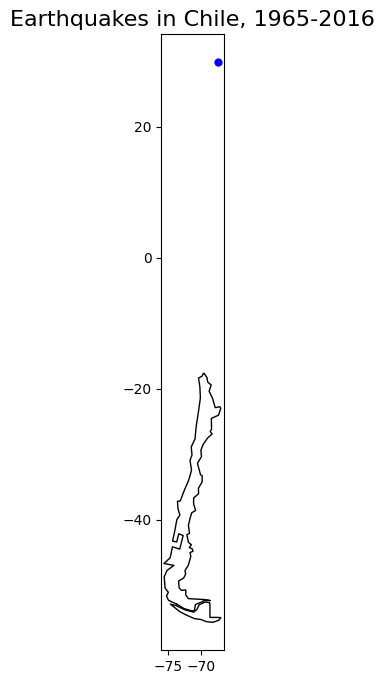

In [152]:

# New center coordinates for Chile
chile_lat = 35.6751
chile_long = -71.5430

# Extend the bounds by 6 degrees on either side of the given latitude and longitude
lat_lower = chile_lat - 6
lat_upper = chile_lat + 6
long_lower = chile_long - 6
long_upper = chile_long + 6

# Filter the earthquake data based on the new latitudes and longitudes
chile_eq = eq[(eq.Latitude > lat_lower) & (eq.Latitude < lat_upper) & 
              (eq.Longitude > long_lower) & (eq.Longitude < long_upper)]

# Reset the index of the filtered data
chile_eq = chile_eq.reset_index(drop=True)

# Convert the filtered earthquake data to a GeoDataFrame
chile_gdf = gpd.GeoDataFrame(chile_eq, geometry=gpd.points_from_xy(chile_eq.Longitude, chile_eq.Latitude))

# Plot the world and filter for Chile
ax = world[world['NAME'] == 'Chile'].plot(color='white', edgecolor='black', figsize=(12, 8))

# Plot the earthquake data on top of the map
chile_gdf.plot(ax=ax, color='blue', markersize=chile_gdf['Magnitude']*4)

# Add a title to the plot
plt.title("Earthquakes in Chile, 1965-2016", fontsize=16)

# Display the plot
plt.show()


/var/folders/q2/94833wl55_l8xcdswqrk28340000gn/T/ipykernel_3082/2518211104.py:25: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  wales_gdf.plot(ax=ax, color='blue', markersize=wales_gdf['Magnitude']*4)


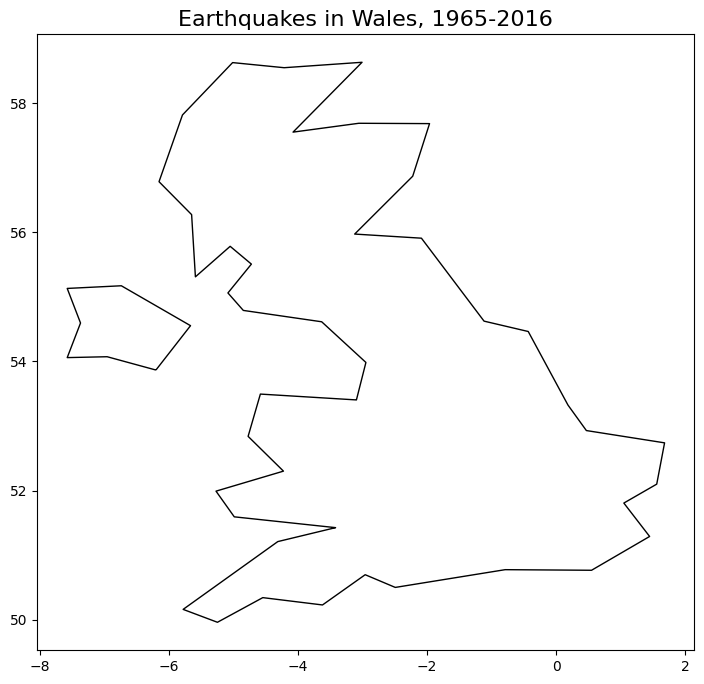

In [153]:

# New center coordinates for Wales
wales_lat = 52.1307
wales_long = -3.7837

# Extend the bounds by 6 degrees on either side of the given latitude and longitude
lat_lower = wales_lat - 6
lat_upper = wales_lat + 6
long_lower = wales_long - 6
long_upper = wales_long + 6

# Filter the earthquake data based on the new latitudes and longitudes
wales_eq = eq[(eq.Latitude > lat_lower) & (eq.Latitude < lat_upper) & 
              (eq.Longitude > long_lower) & (eq.Longitude < long_upper)]

# Reset the index of the filtered data
wales_eq = wales_eq.reset_index(drop=True)

# Convert the filtered earthquake data to a GeoDataFrame
wales_gdf = gpd.GeoDataFrame(wales_eq, geometry=gpd.points_from_xy(wales_eq.Longitude, wales_eq.Latitude))

# Plot the world and filter for Wales
ax = world[world['NAME'] == 'United Kingdom'].plot(color='white', edgecolor='black', figsize=(12, 8))

# Plot the earthquake data on top of the map
wales_gdf.plot(ax=ax, color='blue', markersize=wales_gdf['Magnitude']*4)

# Add a title to the plot
plt.title("Earthquakes in Wales, 1965-2016", fontsize=16)

# Display the plot
plt.show()


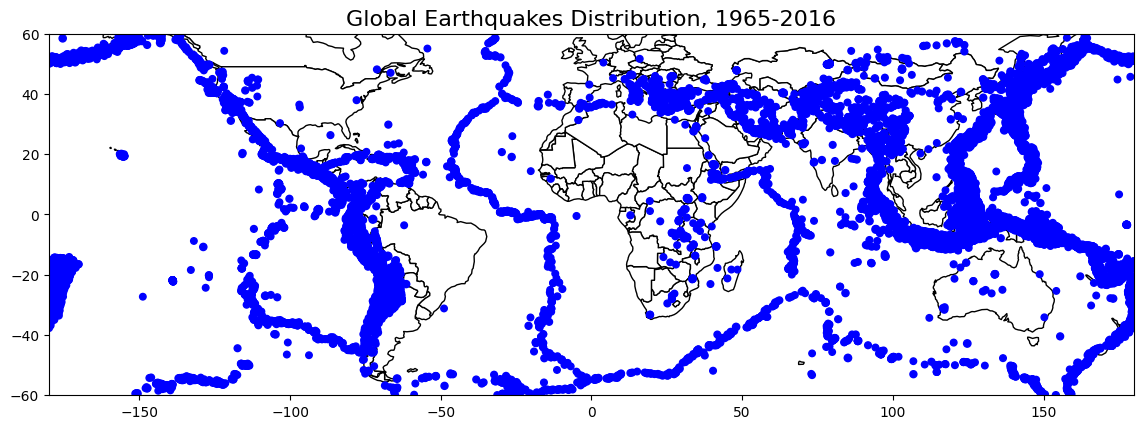

In [154]:

# Define the bounds for the entire Pacific Ring of Fire
lat_lower = -60    # Southernmost point (around Antarctica)
lat_upper = 60     # Northernmost point (covering parts of Alaska)
long_lower = -180  # Westernmost point (west coast of the Americas)
long_upper = 180   # Easternmost point (Asia and the Pacific Islands)

# Filter the earthquake data based on the new latitudes and longitudes
ring_of_fire_eq = eq[(eq.Latitude > lat_lower) & (eq.Latitude < lat_upper) & 
                     (eq.Longitude > long_lower) & (eq.Longitude < long_upper)]

# Reset the index of the filtered data
ring_of_fire_eq = ring_of_fire_eq.reset_index(drop=True)

# Convert the filtered earthquake data to a GeoDataFrame
ring_of_fire_gdf = gpd.GeoDataFrame(ring_of_fire_eq, geometry=gpd.points_from_xy(ring_of_fire_eq.Longitude, ring_of_fire_eq.Latitude))

# Plot the world and focus on the entire Pacific Ring of Fire
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the world map (just to get the boundaries) and focus on the region
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the earthquake data on top of the map
ring_of_fire_gdf.plot(ax=ax, color='blue', markersize=ring_of_fire_gdf['Magnitude']*4)

# Set the limits of the plot to zoom in on the Pacific Ring of Fire region
ax.set_xlim(long_lower, long_upper)  # Longitude bounds (-180 to 180)
ax.set_ylim(lat_lower, lat_upper)    # Latitude bounds (-60 to 60)

# Add a title to the plot
plt.title("Global Earthquakes Distribution, 1965-2016", fontsize=16)

# Display the plot
plt.show()


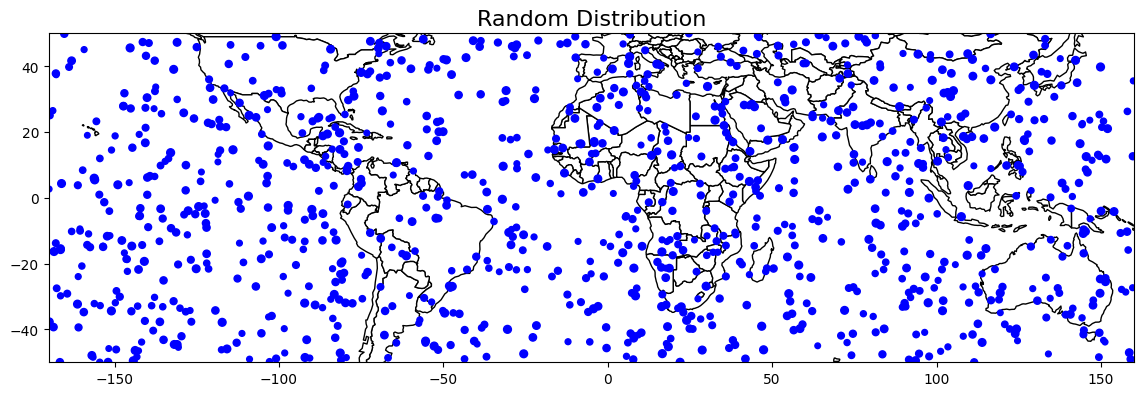

In [155]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the bounds for the Pacific Ring of Fire region
lat_lower = -50    # Southernmost point (southern Chile)
lat_upper = 50     # Northernmost point (northern Japan)
long_lower = -170  # Westernmost point (west coast of the Americas)
long_upper = 160   # Easternmost point (eastern Asia)

# Number of random points (earthquakes) to generate
num_points = 1000  # You can adjust this number based on how many random points you want

# Randomly generate latitudes and longitudes within the bounds
random_lats = np.random.uniform(lat_lower, lat_upper, num_points)
random_longs = np.random.uniform(long_lower, long_upper, num_points)

# Create a DataFrame with the random coordinates
random_eq_df = pd.DataFrame({
    'Latitude': random_lats,
    'Longitude': random_longs,
    'Magnitude': np.random.uniform(4, 8, num_points)  # Random magnitude between 4 and 8
})

# Convert the DataFrame to a GeoDataFrame
random_gdf = gpd.GeoDataFrame(random_eq_df, 
                              geometry=gpd.points_from_xy(random_eq_df.Longitude, random_eq_df.Latitude))

# Plot the world and focus on the Pacific Ring of Fire region
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the world map (only showing the relevant parts)
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the randomly generated earthquake data on top of the map
random_gdf.plot(ax=ax, color='blue', markersize=random_gdf['Magnitude']*4)

# Set the limits of the plot to zoom in on the Pacific Ring of Fire region
ax.set_xlim(long_lower, long_upper)  # Longitude bounds (-170 to 160)
ax.set_ylim(lat_lower, lat_upper)    # Latitude bounds (-50 to 50)

# Add a title to the plot
plt.title("Random Distribution", fontsize=16)

# Display the plot
plt.show()


In [156]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load your earthquake dataset (make sure it's a DataFrame with Latitude, Longitude, and Magnitude)
eq = pd.read_csv('earthquakes.csv')
# Make sure the dataset has 'Latitude', 'Longitude', and 'Magnitude' columns.

# Step 2: Convert the earthquake data to a GeoDataFrame
eq_gdf = gpd.GeoDataFrame(eq, geometry=gpd.points_from_xy(eq.Longitude, eq.Latitude))

# Step 3: Use GeoPandas .explore() method to create the map
m = eq_gdf.explore(
    column='Magnitude',  # Use Magnitude for color-coding (or another column)
    cmap='viridis',  # Choose a color map for the data
    tiles='CartoDB positron',  # Set the basemap
    legend=True,  # Show the legend for the data
    width=800,  # Width of the map
    height=600  # Height of the map
)

# Step 4: Save the map as an HTML file
m.save('earthquake_distribution_map.html')

# Optionally, print a message confirming the map has been saved
print("The map has been saved as 'earthquake_distribution_map.html'. Open this file in a web browser to view the map.")


The map has been saved as 'earthquake_distribution_map.html'. Open this file in a web browser to view the map.
